## Validate the `get_subdivcoords()` function

### Imports

In [1]:
import sys
sys.path.insert(0, '..')
import pymatcal
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### Read in the configuration from `YAML` file

In [2]:
config = pymatcal.get_config('../configs/config.yml')

### Define $p_A$, detector unit in focus and the radial distance. 
- Radial distance measures from the detector unit reference frame origin to the FOV center
- detector unit geometry follows the `config.yml` data structure

In [3]:

pointA = np.array([5, 5, 0])
cuboid = np.array([5, 5.2, 5, 5.3, -0, 5, 0, 5, 1, 0.48])
radial_shift = 0.3


### Get subdivisions pairs
- `pAs` are image subdivision centroids
- `pBs` are detector unit subdivision centroids
- `abpairs` determines all subdivision-to-subdivsion rays

In [4]:
det_subs = pymatcal.get_det_subdivs(cuboid, config['det nsub'])
img_subs = pymatcal.get_img_subdivs(config['mmpvx'],config['img nsub'])
pAs = img_subs['coords']+pointA
pBs = det_subs['coords']+np.array([radial_shift, 0, 0])
abpairs=pymatcal.get_AB_pairs(pAs,pBs)

### Plot $p_A p_B$ subdivision pairs

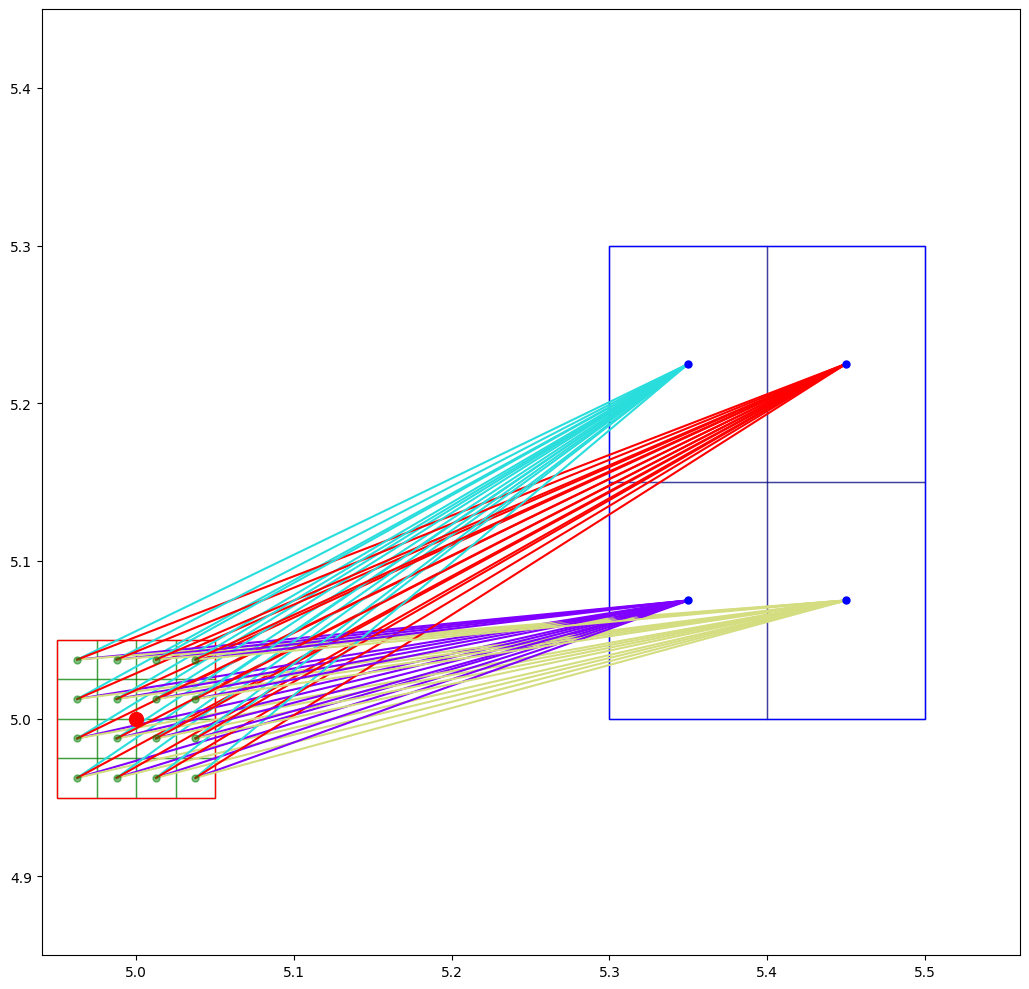

In [5]:
det_subdiv_list = [mpl.patches.Rectangle(
    xy[:2]-det_subs['incs'][:2]*0.5, det_subs['incs'][0], det_subs['incs'][1]) for xy in pBs]
img_subdiv_list = [mpl.patches.Rectangle(
    xy-img_subs['incs'][:2]*0.5, img_subs['incs'][0], img_subs['incs'][1]) for xy in pAs[:, :2]]
fig, ax = plt.subplots(figsize=(12, 10))
pc = mpl.collections.PatchCollection(
    img_subdiv_list, ec=(0, 0.5, 0, 0.5), fc='none')
pc1 = mpl.collections.PatchCollection(
    det_subdiv_list, ec=(0, 0, 0.5, 0.5), fc='none')
nb = pBs.shape[0]
color = plt.cm.rainbow(np.linspace(0, 1, nb))
idx = 0
for pair in abpairs:
    ax.plot(pair[0::3], pair[1::3], ',-', c=color[idx % nb], ms=10)
    idx += 1
ax.plot(pAs[:, 0], pAs[:, 1],
        '.', color=(0, 0.5, 0, 0.5), ms=10)
ax.plot(det_subs['coords'][:, 0]+radial_shift, det_subs['coords'][:, 1],
        '.', color=(0, 0, 1, 1), ms=10)
ax.plot(pointA[0], pointA[1], 'r.', ms=20)
ax.set_xlim(pointA[0]-config['mmpvx'][0]*0.6, pointA[0] +
            config['mmpvx'][0]*.6+radial_shift+cuboid[1]-cuboid[0])
ax.set_ylim(np.min(np.asarray([pointA[1]-config['mmpvx'][1]*0.6, cuboid[2]-0.5*(cuboid[3]-cuboid[2])])),
            np.max(np.asarray([pointA[1]+config['mmpvx'][1]*.6, cuboid[3]+0.5*(cuboid[3]-cuboid[2])])))
ax.add_collection(pc)
ax.add_collection(pc1)
ax.add_patch(mpl.patches.Rectangle(
    (pointA-config['mmpvx']*0.5)[:2], config['mmpvx'][0], config['mmpvx'][1], fc='none', ec='r'))

ax.add_patch(mpl.patches.Rectangle(
    (cuboid[0]+radial_shift, cuboid[2]), cuboid[1]-cuboid[0], cuboid[3]-cuboid[2], fc='none', ec='b'))
ax.set_aspect('equal')
fig.tight_layout()
# fig.savefig("get_subdivcoords.png",dpi=300)